In [113]:
import pandas as pd
import numpy as np
from math import ceil

In [58]:
history = pd.read_excel('Staffing History Updated.xlsx', sheet_name='Sheet7').dropna()
history['Team'] = float('nan')
history.head()

,#,Employee,002 - Strategic Sourcing Services,2021 OPEX Cost Reduction,ACA/Retail P&L Improvement,Administrative Cost Management,Ambetter Specialist Network Rate Analysis,Analytics,Analytics Acceleration,Analytics and Delivery Support,...,Vaccine Scheduling Program Manager,Vaccine State Manager,Vaccine Tech Support On/Off,Value Based Care Analytics,VBC Support,VBP Contracting Support,VBP Data Mart Output,Vendor Risk Assessment,Vendor Risk Contract Remediation Support,Team
0,1.0,"Abbas, Hadiqa",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2.0,"Albrecht, Megan",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3.0,"Ancona, Joseph",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4.0,"Andersen, Nathan",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5.0,"Appleman, Jeff",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [59]:
roles = pd.read_excel('Staffing History Updated.xlsx', sheet_name='Individual_Staffing_8wk_report_', usecols=['User', 'User Job code']).drop_duplicates().reset_index(drop=True)
roles

,User,User Job code
0,"Abbas, Hadiqa",Senior Consultant
1,"Albrecht, Megan",Consultant
2,"Ancona, Joseph",Senior Consultant
3,"Andersen, Nathan",Operations
4,"Appleman, Jeff",Consultant
...,...,...
204,"Yeager, Emily",Analyst
205,"Yu, Connie",Consultant
206,"Zagrzejewski, Mari",Director
207,"Zaruba, Suzanne",Director


In [60]:
order = ['Analyst', 'Consultant', 'Senior Consultant', 'Manager', 'Director', 'VP', 'Managing Director']
full_order = [role for role in roles['User Job code'].unique() if role not in order] + order
roles['User Job code'] = roles['User Job code'].astype('category').cat.reorder_categories(full_order).cat.as_ordered()

history = history.merge(roles, how='left', left_on='Employee', right_on='User')
roles = history['User Job code']
history = history.drop(labels=['User Job code', 'User'], axis=1)
history.insert(2, 'Role', roles)

In [63]:
history.head()

,#,Employee,Role,002 - Strategic Sourcing Services,2021 OPEX Cost Reduction,ACA/Retail P&L Improvement,Administrative Cost Management,Ambetter Specialist Network Rate Analysis,Analytics,Analytics Acceleration,...,Vaccine Scheduling Program Manager,Vaccine State Manager,Vaccine Tech Support On/Off,Value Based Care Analytics,VBC Support,VBP Contracting Support,VBP Data Mart Output,Vendor Risk Assessment,Vendor Risk Contract Remediation Support,Team
0,1.0,"Abbas, Hadiqa",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,2.0,"Albrecht, Megan",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,3.0,"Ancona, Joseph",Senior Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,4.0,"Andersen, Nathan",Operations,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,5.0,"Appleman, Jeff",Consultant,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [24]:
leads = pd.read_excel('Staffing History Updated.xlsx', sheet_name='Leads', header=None)
leads = leads.values[:,0].tolist()
leads

['Kevin Byrnes',
 'Kevin Fattor',
 'John Haffey',
 'Tyler Higgins',
 'Elizabeth Levy',
 'Paul Schuhmacher']

# Greedy

In [51]:
NUM_GROUPS = len(leads)
GROUP_SIZE = (history.shape[0] - NUM_GROUPS) // NUM_GROUPS

In [88]:
for group_num, lead in enumerate(leads):
    first, last = lead.split(' ')
    lead_vec = history[history['Employee'] == f'{last}, {first}'].iloc[:, 3:-1]
    history.loc[lead_vec.index, 'Team'] = group_num + 1

In [116]:
for group_num in range(1, NUM_GROUPS + 1):
    group_avg_vec = history[history['Team'] == group_num].iloc[:, 3:-1].values.mean(axis=0)
    for role in history['Role'].cat.categories[::-1]: # loop through MDs, VPs, Directors, Managers, Senior Consultants, Analysts, and others   
        num_mbrs_from_role_in_group = ceil((history['Role'] == role).sum() / NUM_GROUPS)
        data_vecs = history[(history['Role'] == role) & (history['Team'].isna())].iloc[:, 3:-1]
        dist = pd.Series(np.linalg.norm(np.subtract(group_avg_vec, data_vecs.values), axis=1), index=data_vecs.index).sort_values()
        history.loc[dist.iloc[:num_mbrs_from_role_in_group].index, 'Team'] = group_num

**Team Breakdown**

In [137]:
history['Team'].value_counts()

1.0    46
2.0    38
3.0    36
4.0    33
5.0    29
6.0    21
Name: Team, dtype: int64

In [127]:
for team in sorted(history['Team'].unique()):
    display(history.loc[history['Team'] == team, 'Role'].value_counts().to_frame().T)

,Consultant,Senior Consultant,Managing Director,Analyst,Director,Manager,CODE Director of Data Engineering,VP,CODE Digital Intelligence Consultant,Operations,CODE Data Architecture Consultant,CODE Manager,CODE Sr. DA Consultant,Architect,Intern,CODE Data Analyst,CODE Support,CODE Director,CODE Sr. Digital Intelligence Consultant
Role,8,7,5,5,4,4,1,1,1,1,1,1,1,1,1,1,1,1,1


,Consultant,Senior Consultant,Analyst,Managing Director,Director,Manager,CODE Director,CODE Support,CODE Data Analyst,Intern,VP,CODE Manager,Operations,CODE Digital Intelligence Consultant,CODE Director of Data Engineering,CODE Data Architecture Consultant,CODE Sr. DA Consultant,Architect,CODE Sr. Digital Intelligence Consultant
Role,8,7,5,4,4,4,1,1,1,1,1,1,0,0,0,0,0,0,0


,Consultant,Senior Consultant,Managing Director,Analyst,Director,Manager,CODE Support,CODE Data Analyst,Intern,CODE Digital Intelligence Consultant,VP,Operations,CODE Director of Data Engineering,CODE Data Architecture Consultant,CODE Manager,CODE Sr. DA Consultant,Architect,CODE Director,CODE Sr. Digital Intelligence Consultant
Role,8,7,5,5,4,4,1,1,1,0,0,0,0,0,0,0,0,0,0


,Consultant,Senior Consultant,Analyst,Director,Manager,Managing Director,CODE Support,CODE Data Analyst,CODE Digital Intelligence Consultant,VP,Operations,CODE Director of Data Engineering,CODE Data Architecture Consultant,CODE Manager,CODE Sr. DA Consultant,Architect,Intern,CODE Director,CODE Sr. Digital Intelligence Consultant
Role,8,7,5,4,4,3,1,1,0,0,0,0,0,0,0,0,0,0,0


,Consultant,Senior Consultant,Analyst,Director,Manager,Managing Director,CODE Director of Data Engineering,VP,CODE Digital Intelligence Consultant,Operations,CODE Data Architecture Consultant,CODE Manager,CODE Sr. DA Consultant,Architect,Intern,CODE Data Analyst,CODE Support,CODE Director,CODE Sr. Digital Intelligence Consultant
Role,8,7,5,4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0


,Consultant,Analyst,Manager,Director,Senior Consultant,Managing Director,CODE Director of Data Engineering,VP,CODE Digital Intelligence Consultant,Operations,CODE Data Architecture Consultant,CODE Manager,CODE Sr. DA Consultant,Architect,Intern,CODE Data Analyst,CODE Support,CODE Director,CODE Sr. Digital Intelligence Consultant
Role,5,5,4,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# Visualize

In [128]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

In [132]:
pca = PCA(n_components=2)
ppl_red_pca = pca.fit_transform(history.iloc[:,3:-1].values)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


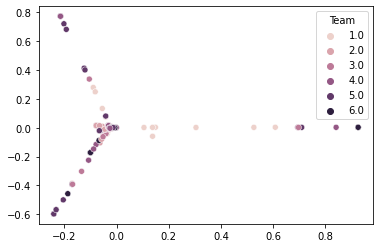

In [133]:
sns.scatterplot(ppl_red_pca[:,0], ppl_red_pca[:,1], hue=history['Team'])

In [134]:
tsne = TSNE(n_components=2)
ppl_red_tsne = tsne.fit_transform(history.iloc[:,3:-1].values)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


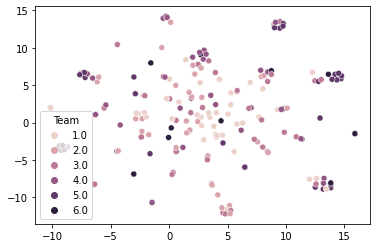

In [135]:
sns.scatterplot(ppl_red_tsne[:,0], ppl_red_tsne[:,1], hue=history['Team'])

# Export

In [136]:
history.to_csv('assignments_greedy.csv')